This notebook demonstrates the conversion of AEM data from aseg-gdf format to netCDF format

Neil Symington
neil.symington@ga.gov.au

In [1]:
%matplotlib inline

from geophys_utils.netcdf_converter import aseg_gdf2netcdf_converter
from geophys_utils.netcdf_converter.aseg_gdf_utils import aseg_gdf_format2dtype
from hydrogeol_utils import AEM_utils
import netCDF4
import os, math
import numpy as np
import matplotlib.pyplot as plt
# SO we can see the logging. This enables us to debug
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


DEBUG:root:test


In [2]:

#root = r"\\prod.lan\active\proj\futurex\East_Kimberley\Data\Processed\Geophysics\AEM\EK_nbc_inversions\OrdKeep_borehole_constrained\combined_aseg_gdf"
root = r"\\prod.lan\active\proj\futurex\East_Kimberley\Data\Original\Geophysics\AEM\OrdKeep_SkyTEM_190117\01_EM"

nc_out_path = os.path.join(root, 'AUS_10021_OrdK_EM.nc')

dat_in_path = os.path.join(root, 'AUS_10021_OrdK_EM.dat')
dfn_in_path = os.path.join(root, 'AUS_10021_OrdK_EM.dfn')
crs_string = "EPSG:28352"

In [3]:
if os.path.exists(nc_out_path):
    os.remove(nc_out_path)



d2n = aseg_gdf2netcdf_converter.ASEGGDF2NetCDFConverter(nc_out_path, 
                                                 dat_in_path, 
                                                 dfn_in_path,
                                                 crs_string,
                                                 fix_precision=True)
d2n.convert2netcdf()                                      

INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Reading definitions file \\prod.lan\active\proj\futurex\East_Kimberley\Data\Original\Geophysics\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM.dfn
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Reading data file \\prod.lan\active\proj\futurex\East_Kimberley\Data\Original\Geophysics\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM.dat
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:10000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:20000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:30000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:40000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:50000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:60000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:70000 lines read
INFO:geophys_utils.netcdf_conv

INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable northing changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable gps_height changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable gdspeed changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable LM_current changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable HM_current changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable powerline_noise changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable high_moment_Z-component_EM_data changed from float64 to float32
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Datatype for variable high_m

OrderedDict([('point', 660371), ('low_moment_gate', 18), ('high_moment_gate', 23)])


INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing single comments value to scalar variable
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing 1D float32 variable flight_line
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing single ga_project value to scalar variable
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing single job_no value to scalar variable
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing 1D float32 variable fiducial
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing line lookup variables
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Creating dimension for line
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:		Writing 584 line lookup values to array variable line
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:		Writing line lookup indices to array variable line_index
INFO:geophys_utils.netcdf_converter.as

In [4]:
# Create a python object with the EM dataset
d = netCDF4.Dataset(nc_out_path, "a")

In [5]:
d.variables['rel_uncertainty_low_moment_X-component'][:]

array([[7.900000e-04, 7.800000e-04, 1.050000e-03, ..., 4.170000e-03,
        5.110000e-03, 7.600000e-03],
       [9.100000e-04, 9.000000e-04, 1.210000e-03, ..., 4.700000e-03,
        5.700000e-03, 8.350000e-03],
       [1.050000e-03, 1.030000e-03, 1.380000e-03, ..., 5.210000e-03,
        6.340000e-03, 9.140000e-03],
       ...,
       [3.719100e-01, 3.365400e-01, 9.521000e-02, ..., 2.910900e-01,
        6.246400e-01, 1.114970e+00],
       [1.334110e+00, 1.916700e-01, 7.098000e-02, ..., 1.583800e-01,
        9.844300e-01, 8.213300e-01],
       [1.191210e+00, 1.469900e-01, 6.185000e-02, ..., 1.236400e-01,
        1.250202e+01, 3.220000e-01]], dtype=float32)

In [6]:
# Now we want to parse the stm files

# Create an AEM system instance
skytem = AEM_utils.AEM_System("SkyTEM312Fast", dual_moment = True)

# Open the lm and hm files
root = r"\\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\OK_AEM_working\EastKimberley\stmfiles"

lm_file = os.path.join(root, "Skytem312Fast-LM_pV.stm")

hm_file = os.path.join(root, "Skytem312Fast-HM_pV.stm")

# Parse
skytem.parse_stm_file(lm_file, 'LM')

skytem.parse_stm_file(hm_file, 'HM')

In [7]:
skytem.LM

{'ForwardModelling': {'FrequenciesPerDecade': 5,
  'ModellingLoopRadius': 10.4184,
  'NumberOfAbsiccaInHankelTransformEvaluation': 21,
  'OutputType': 'dB/dt',
  'SaveDiagnosticFiles': 'no',
  'SecondaryFieldNormalisation': 'none',
  'XOutputScaling': 1000000000000.0,
  'YOutputScaling': 1000000000000.0,
  'ZOutputScaling': 1000000000000.0},
 'Receiver': {'CutOffFrequency': array([300000, 155000]),
  'NumberOfWindows': 18,
  'Order': '1      2',
  'WindowTimes': array([[1.4630e-05, 1.8200e-05],
         [1.8630e-05, 2.3200e-05],
         [2.3630e-05, 2.9200e-05],
         [2.9630e-05, 3.7200e-05],
         [3.7630e-05, 4.7200e-05],
         [4.7630e-05, 6.0200e-05],
         [6.0630e-05, 7.6200e-05],
         [7.6630e-05, 9.6200e-05],
         [9.6630e-05, 1.2120e-04],
         [1.2163e-04, 1.5220e-04],
         [1.5263e-04, 1.9220e-04],
         [1.9263e-04, 2.4320e-04],
         [2.4363e-04, 3.0620e-04],
         [3.0663e-04, 3.8720e-04],
         [3.8763e-04, 4.8820e-04],
         [

In [8]:

lm_a = skytem.LM['Transmitter']['WaveFormCurrent']
hm_a = skytem.HM['Transmitter']['WaveFormCurrent']

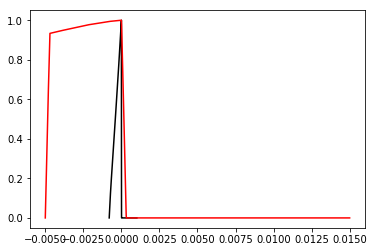

In [9]:



plt.plot(lm_a[:,0], lm_a[:,1], 'k')
plt.plot(hm_a[:,0], hm_a[:,1], 'r')
plt.show()

In [10]:
# Now we want to add this metadata to the netcdf file

tx_grp = d.createGroup('Transmitter')


# Dimensions for the current times
lm_current_times = tx_grp.createDimension("low_moment_current_time", 
                                    skytem.LM['Transmitter']['WaveFormCurrent'].shape[0])

hm_current_times = tx_grp.createDimension("high_moment_current_time", 
                                    skytem.HM['Transmitter']['WaveFormCurrent'].shape[0])



In [11]:
# Create dimension variables

lm_current_times = tx_grp.createVariable("low_moment_current_time","f8",("low_moment_current_time",))
hm_current_times = tx_grp.createVariable("high_moment_current_time","f8",("high_moment_current_time",))



In [12]:
# Create other variables

lm_waverform_current = tx_grp.createVariable("low_moment_waverform_current","f8",("low_moment_current_time",))

hm_waverform_current = tx_grp.createVariable("high_moment_waverform_current","f8",("high_moment_current_time",))

In [13]:
# Add data to the variables

lm_current = skytem.LM['Transmitter']['WaveFormCurrent']
hm_current = skytem.HM['Transmitter']['WaveFormCurrent']

lm_current_times[:] = lm_current[:,0]
hm_current_times[:] = hm_current[:,0]

lm_waverform_current[:] = lm_current[:,1]
hm_waverform_current[:] = hm_current[:,1]

In [14]:
# Add an scalar vats for frame geometries assuming a horizontal frame
# These are from the SkyTEM files



tx_area = tx_grp.createVariable('tx_loop_area',"f8",())
tx_area[:] = 337.
tx_area.units = 'm**2'
tx_area.long_name = "Transmitter (Tx) Loop Area"


In [15]:
rx_grp = d.createGroup('Receiver')

In [16]:
gate_openclose = rx_grp.createDimension("gate_open_close", 
                                   2)
gates = rx_grp.createVariable("gate_open_close","i1",("gate_open_close",))


In [17]:


lm_window_times =  rx_grp.createVariable("low_moment_window_time","f8",("low_moment_gate",
                                                                  "gate_open_close"))

hm_window_times =  rx_grp.createVariable("high_moment_window_time","f8",("high_moment_gate",
                                                                   "gate_open_close"))


In [18]:
# Add data

lm_gates = skytem.LM['Receiver']['WindowTimes']
hm_gates = skytem.HM['Receiver']['WindowTimes']

lm_window_times[:] = lm_gates
hm_window_times[:] = hm_gates

In [19]:


rx_x_pos = rx_grp.createVariable("Rx_z_component_position_x","f8",())
rx_x_pos[:] = -13.37
rx_x_pos.units = 'm'
rx_x_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, in flight direction'
rx_x_pos.sign_convention = 'Front of frame is positive'

rx_y_pos = rx_grp.createVariable("Rx_z_component_position_y","f8",())
rx_y_pos[:] = 0.
rx_y_pos.units = 'm'
rx_y_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, perpendicular to flight direction'
rx_y_pos.sign_convention = 'Starboard of frame is positive'

rx_z_pos = rx_grp.createVariable("Rx_z_component_position_z","f8",())
rx_z_pos[:] = -2.
rx_z_pos.units = 'm'
rx_z_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, in vertical direction'
rx_z_pos.sign_convention = 'Down is positive'

In [20]:
rx_x_x_pos = rx_grp.createVariable("Rx_x_component_position_x","f8",())
rx_x_x_pos[:] = -14.75
rx_x_x_pos.units = 'm'
rx_x_x_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, in flight direction'
rx_x_x_pos.sign_convention = 'Front of frame is positive'

rx_x_y_pos = rx_grp.createVariable("Rx_x_component_position_y","f8",())
rx_x_y_pos[:] = 0.
rx_x_y_pos.units = 'm'
rx_x_y_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, perpendicular to flight direction'
rx_x_y_pos.sign_convention = 'Starboard of frame is positive'

rx_x_z_pos = rx_grp.createVariable("Rx_x_component_position_z","f8",())
rx_x_z_pos[:] = -0.04
rx_x_z_pos.units = 'm'
rx_x_z_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, in vertical direction'
rx_x_z_pos.sign_convention = 'Down is positive'

In [21]:
lm_waverform_current.units = 'normalised_current_amplitude'
hm_waverform_current.units = 'normalised_current_amplitude'

lm_current_times.units = 'seconds'
hm_current_times.units = 'seconds'

lm_window_times.units = 'seconds_since_waveform_rampdown'
hm_window_times.units = 'seconds_since_waveform_rampdown'

In [22]:
# Now we want to calculate the roll pitch and yaw

#Input angle X and Y in the SkyTEM sign convention 
#Nose up      = +ve x-tilt
#Left wing up = +ve y-tilt

#output roll and pitch are in the GA modelling sign convention
#Left wing up = +ve roll    
#Nose down is = +ve pitch
#turn left is = +ve yaw

# As frame roll is simply y-tilt we just rename the variable
try:
    d.renameVariable('y_tilt', 'roll')
except KeyError:
    print('Variable not found')

# We need to recalcualte for the GA convention
d2r = math.pi/180
r2d = 180/math.pi
try:
    # From Ross' tilt2rollpitchyaw function
    frame_pitch = -r2d * np.arcsin(np.sin(d2r*d.variables['x_tilt'][:])/
                                   np.cos(d2r*d.variables['roll'][:]))
    d.variables['x_tilt'][:] = frame_pitch
    d.renameVariable('x_tilt', 'pitch')
except KeyError:
    print('Variable not found')

# Yaw is zero so we can just create a scalar variable
yaw =  d.createVariable("yaw","f8",())
yaw[:] = 0


In [23]:
# Add an attribute describing the sign convention
pitch = d['pitch']
pitch.sign_convention = 'Nose down is positive pitch'

roll = d['roll']
pitch.sign_convention = 'Left wing up is positive roll'

d['yaw'].long_name = 'Rotation of frame vertical axis'


In [24]:
def rollpitchyaw_array(roll, pitch, yaw):
    """
    FRom Ross' rollpitchyaw_matrix.m
    """

    d2r = math.pi/180
    # Calculate the cosine and sine of role, pitch and yaw
    cosr = np.cos(d2r*roll);
    cosp = np.cos(d2r*pitch);
    cosy = np.cos(d2r*yaw);

    sinr = np.sin(d2r*roll);
    sinp = np.sin(d2r*pitch);
    siny = np.sin(d2r*yaw)
    # Create the array
    a = np.zeros(shape = (roll.shape[0],3,3), dtype = np.float32)
    a[:,0,0] = cosp*cosy
    a[:,0,1] = cosp*siny
    a[:,0,2] = -sinp
    a[:,1,0] = sinr*sinp*cosy - cosr*siny
    a[:,1,1] = sinr*sinp*siny + cosr*cosy
    a[:,1,2] = sinr*cosp
    a[:,2,0] = cosr*sinp*cosy + sinr*siny
    a[:,2,1] = cosr*sinp*siny - sinr*cosy
    a[:,2,2] = cosr*cosp
    
    return a


In [25]:
# Get the offsets for the receiver

yaw_arr = yaw[:]*np.ones(shape=roll[:].shape,
              dtype = roll[:].dtype)

R = rollpitchyaw_array(roll[:], pitch[:],
                       yaw_arr)
# Get the offsets of the receiver when the frame is horizontal
txrx_dx = d['Receiver']['Rx_z_component_position_x'][:]
txrx_dy = d['Receiver']['Rx_z_component_position_y'][:] 
txrx_dz = d['Receiver']['Rx_z_component_position_z'][:]

v0 = np.array([txrx_dx, txrx_dy, txrx_dz])

# Get matrix products of two arrays

V = np.matmul(v0, R)


In [26]:
# Create variables

txrx_dx = d.createVariable("TxRx_dx","f8",('point'))
txrx_dx[:] = V[:,0]
txrx_dx.units = 'm'
txrx_dx.aseg_gdf_format = 'E7.2'
txrx_dx.long_name = 'Z-component EM sensor relative position from centre of frame, in flight direction'
txrx_dx.sign_convention = 'Front of frame is positive'

txrx_dy = d.createVariable("TxRx_dy","f8",('point'))
txrx_dy[:] = V[:,1]
txrx_dy.units = 'm'
txrx_dy.aseg_gdf_format = 'E7.2'
txrx_dy.long_name = 'X-component EM sensor relative position from centre of frame, perpendicular to flight direction'
txrx_dy.sign_convention = 'Starboard of frame is positive'

txrx_dz = d.createVariable("TxRx_dz","f8",('point'))
txrx_dz[:] = V[:,2]
txrx_dz.units = 'm'
txrx_dz.aseg_gdf_format = 'E7.2'
txrx_dz.long_name = 'X-component EM sensor relative position from centre of frame, in vertical direction'
txrx_dz.sign_convention = 'Down is positive'

In [27]:
d.close()

In [28]:
# Create a python object with the EM dataset
d = netCDF4.Dataset(nc_out_path, "r")

In [43]:
d['Transmitter']['tx_']

<class 'netCDF4._netCDF4.Group'>
group /Transmitter:
    dimensions(sizes): low_moment_current_time(19), high_moment_current_time(15)
    variables(dimensions): float64 low_moment_current_time(low_moment_current_time), float64 high_moment_current_time(high_moment_current_time), float64 low_moment_waverform_current(low_moment_current_time), float64 high_moment_waverform_current(high_moment_current_time), float64 tx_loop_area()
    groups: 